# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('human_body_temperature.csv')

In [2]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


First we construct a histogram of all of the 131 observations, regardless of gender, and review it to consider if it appears to conform to the Normal (Gaussian) distribution. Our first investigation with the default option of ten bins suggests that it is not.Specifically, the right Tail is lower than the left Tail. 

However, we know from experience that sometimes the perception can shift when the number of bins for the histogram is increased, so the analysis is then repeated with thirty bins.This yields a rather different possibility. While the distribution does arguably look a bit more more normal, it appears that it might be bi-modal! A bi-modal distribution is most decidedly NOT normal (but importantly the Central Limit Theorem would still apply, but the rquired sample size might be closer to 300 than the 30 normally quoted for the Normal Distribution). 

In [3]:
# DWW configure these as a grid so they are side by side. 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
_= plt.hist(df['temperature'])
_= plt.xlabel('Body Temperature')
_= plt.ylabel('Frequency')
plt.show()
# add redline vertical df.temperature.mean() gives 98.25

<Figure size 640x480 with 1 Axes>

In [4]:
df.temperature.mean(), df.temperature.std()

(98.24923076923078, 0.7331831580389454)

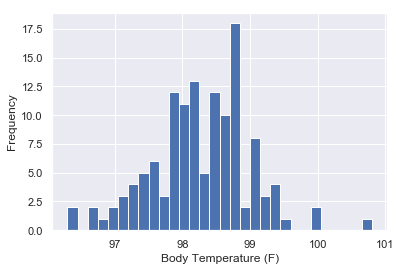

In [5]:
sns.set()
_= plt.hist(df['temperature'], bins=30)
_= plt.xlabel('Body Temperature (F)')
_= plt.ylabel('Frequency')
plt.show()
# add redline vertical df.temperature.mean() gives 98.25

In [6]:
import numpy as np
bs_sample= np.random.choice(df.temperature, size=135)
np.mean(bs_sample)


98.28814814814814

In [7]:
def bootstrap_replicate_1D(data, func):
    """Generate bootstrap replicate of 1D data"""
    bs_sample= np.random.choice(data, len(data))
    return func(bs_sample)


In [8]:
bootstrap_replicate_1D(df.temperature, np.mean)

98.20384615384616

In [9]:
import numpy as np
bs_replicates = np.empty(10000)

for i in range(10000):
    bs_replicates[i]= bootstrap_replicate_1D(df.temperature, np.mean)

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


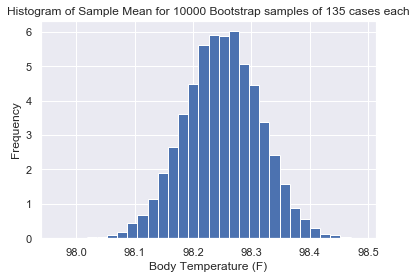

In [10]:
sns.set()
_= plt.hist(bs_replicates, bins=30, normed=True)
_= plt.xlabel('Body Temperature (F)')
_= plt.ylabel('Frequency')
_= plt.title('Histogram of Sample Mean for 10000 Bootstrap samples of 135 cases each')
plt.show()

In [11]:
conf_int= np.percentile(bs_replicates, [2.5,97.5])
conf_int
# Add two vertical lines to mark interval

array([98.12230769, 98.37615385])

So regarding our original question, "The mean normal body temperature was held to be 98.6∘F for more than 120 years 
since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. 
But, is this value statistically correct?"
Since the value of 98.6 lies outside the "Bootstrap confidence interval", we should reject Wunderlich's hypothesis that the mean is 98.6 F.

Regarding the Frequentist approach, we should (predicated upon the normality of the distribution, which as discussed 
above is somewhat dubious), derive a t-value by dividing the difference between the hypothesised population mean and the observed sample mean of 98.249, and dividing by the Standard error of the mean (here the sample standard deviation of 0.733 divided by the square root of 135.

In [12]:
Frequentist_t_value = (98.6 - np.mean(df.temperature))/(np.std(df.temperature)/(len(df.temperature)**0.5))
Frequentist_t_value

5.475925202078116

The appropriate test here is two-tailed, and the t-value is so high that it is significant at the 1% level.
So the Null Hypothesis must also be rejected acording to the frequentist approach. 
Incidentally, tha same conclusion would have been drawn hhad a z-value been used, since (a) with a sample size of 135 the t-value and the z value are not much different, and (b) the t-values are higher than the z-value (of 2.33 for the 1% Significance Level).

In [13]:
small_sample= np.random.choice(df.temperature, size=10)
np.mean(small_sample)
small_t_value = (98.6 - np.mean(small_sample))/(np.std(small_sample)/(len(small_sample)**0.5))
np.mean(small_sample), small_t_value

(98.23999999999998, 1.7901809334480612)

With the small sample of just ten cases, the result is not statistically significant 

Is there a statistical difference between males and females? 
So now we create two dataframes and compare the normed histograms, and their means and variance. 
We can then conduct significance tests to see if the mean temperature is statistically significant.
From the histograms below we can observe that neither distribution is particularly normal, and furthermore that all of the highest temperature values are recorded by females. 
Because of the lack of normality, and because the sample sizes for each of the two genders is far below the 300 threshold cited for the Centrakl Limit Theorem where the population is not normal, the Bootstrap approach appears to be 
the more robust approach.

In [14]:
male= df[df.gender== 'M'].temperature
female = df[df.gender== 'F'].temperature

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


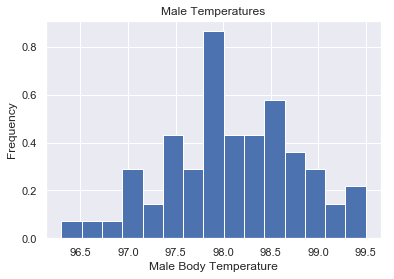

In [15]:
sns.set()
_= plt.hist(male, normed= True, bins=15)
_= plt.xlabel('Male Body Temperature')
_= plt.ylabel('Frequency')
_= plt.title('Male Temperatures')
plt.show()
# add redline vertical df.temperature.mean() gives 98.25

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


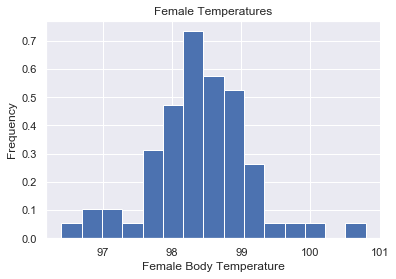

In [16]:
sns.set()
_= plt.hist(female, normed= True, bins=15)
_= plt.xlabel('Female Body Temperature')
_= plt.ylabel('Frequency')
_= plt.title('Female Temperatures')
plt.show()
# add redline vertical df.temperature.mean() gives 98.25

From the above two histograms it appears that we need to do a Bootstrap significance test for the difference of 
two means (for males and females respectively) for distributions that are NOT identical.
The Code for this is set forth below, and yields a P-value of zero!!
Accordingly, there is a statistically significant difference between males and females, with females having a higher mean temperature. 


In [17]:
# draw_bs_reps()
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    return func(np.random.choice(data,size=len(data)))
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

In [18]:
temp_concat= np.concatenate((male, female))
mean_temp = np.mean(temp_concat)  # Compute mean of all temperatures
empirical_diff_means = np.mean(female) - np.mean(male)
male_shifted = male - np.mean(male) + mean_temp  # Generate shifted arrays
female_shifted = female - np.mean(female) + mean_temp
bs_replicates_male = draw_bs_reps(male_shifted, np.mean, size=10000)#Compute 10000 bootstrap replicates from shifted arrays
bs_replicates_female = draw_bs_reps(female_shifted, np.mean, size=10000)
bs_replicates = bs_replicates_male - bs_replicates_female   # Get replicates of difference of means: bs_replicates

p = np.sum(bs_replicates > empirical_diff_means) /10000 # len(bs_replicates) # Compute and print p-value: p
print('p-value =', p)

p-value = 0.0


Write a story with with your conclusion in the context of the original problem:

“It ain't what you don't know that gets you into trouble. It's what you know for sure that just ain't so.” Quote attributed to Mark Twain

The mean normal body temperature was held to be 98.6∘F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

The foregoing analysis has revealed at least two findings of interest.

First, when we take the mixed gender sample of 135 men and women, the mean body temperature of the sample was 98.2, and this level was significantly below the 98.6 value attributed to Carl Wunderlich, and apparantly accepted by the scientific community for more than 120 years.

Second, within the aggregate sample a Bootstrap analysis revealed that the temperatures of females was higher than for males, and that this difference was highly statistically significant.

This raises the question as to whether Wunderlich's sample (taken prior to 1868) could have been composed entirely of females. But this might be considered unlikely by some.
